# This algorithm buys when SMA-20 crosses lower bollinger, sells when SMA crosses upper bollinger

In [80]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [81]:
df = yf.download("TSLA",start='2020-01-01')


# The simple moving average on a 20 days rolling

df['SMA'] = df.Close.rolling(window=20).mean()

# Calulating upper and lower band

df['stddev'] = df.Close.rolling(window=20).std()

df['Upper'] = df.SMA + 2*df.stddev # upper bb

df['Lower'] = df.SMA - 2*df.stddev #lower bb

df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower
Date,,,,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500,NaN,NaN,NaN,NaN
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN,NaN,NaN,NaN
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,NaN,NaN,NaN,NaN
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,NaN,NaN,NaN,NaN
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-09,836.450012,845.630005,781.150024,787.109985,787.109985,30270100,939.439505,68.790513,1077.020531,801.858479
2022-05-10,819.309998,825.359985,774.250000,800.039978,800.039978,28133900,930.645004,74.855779,1080.356563,780.933446
2022-05-11,795.000000,809.770020,727.200012,734.000000,734.000000,32408200,917.997504,85.459804,1088.917112,747.077895


Defining the buy and sell signals

In [82]:

df['buy_signal'] = np.where(df.Lower>df.Close,True,False) # if lower BB is higher than the close, we buy
df['sell_signal'] = np.where(df.Upper< df.Close,True,False) # if Upper BB is lower than the close, we sell
df

,Open,High,Low,Close,Adj Close,Volume,SMA,stddev,Upper,Lower,buy_signal,sell_signal
Date,,,,,,,,,,,,
2019-12-31,81.000000,84.258003,80.416000,83.666000,83.666000,51428500,NaN,NaN,NaN,NaN,False,False
2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500,NaN,NaN,NaN,NaN,False,False
2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500,NaN,NaN,NaN,NaN,False,False
2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000,NaN,NaN,NaN,NaN,False,False
2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,836.450012,845.630005,781.150024,787.109985,787.109985,30270100,939.439505,68.790513,1077.020531,801.858479,True,False
2022-05-10,819.309998,825.359985,774.250000,800.039978,800.039978,28133900,930.645004,74.855779,1080.356563,780.933446,False,False
2022-05-11,795.000000,809.770020,727.200012,734.000000,734.000000,32408200,917.997504,85.459804,1088.917112,747.077895,True,False


In [83]:


# NA occurs as we have rolling values

df = df.dropna()





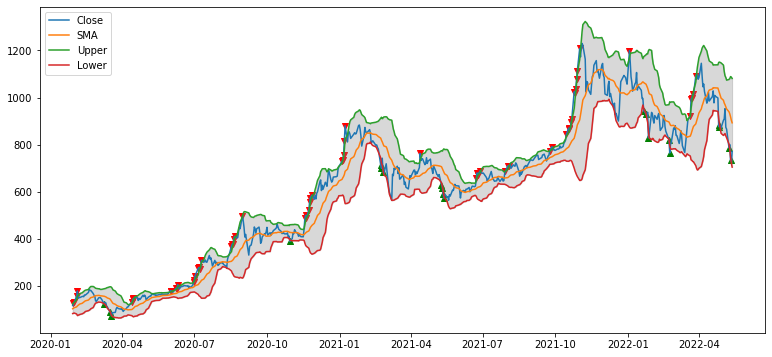

In [84]:
plt.figure(figsize=(13,6))

plt.scatter(df.index[df.buy_signal],df[df.buy_signal].Close,marker="^",color="g")
plt.scatter(df.index[df.sell_signal],df[df.sell_signal].Close,marker="v",color="r")

plt.fill_between(df.index,df.Upper,df.Lower,color="grey",alpha=0.3)

plt.plot(df[["Close","SMA","Upper","Lower"]])
plt.legend(["Close","SMA","Upper","Lower"])
plt.show()

As you can see from the plot, we get a error whenever we sold or bought the security. Need to fix this problem. Need to ignore sbeequent signals

In [85]:
buys=[]
sells=[]
open_pos=False # begins with false as initial position is closed for us

#whenever we buy , set boolean to be true, when we sell set boolean to false

for i in range(len(df)):
    
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i) # Value stock is bought for
            # the position is now open to trade 
            open_pos=True 
    
    elif df.Upper[i]< df.Close[i]: # check if we need to sell first
        if open_pos: # if this is true then we sell. 
            sells.append(i)
            open_pos = False
            


In [86]:
merge = pd.concat([df.iloc[buys].Close,df.iloc[sells].Close],axis=1)
merge.columns = ["Buys","Sells"]


merge



,Buys,Sells
Date,,
2020-03-09,121.599998,NaN
2020-04-13,NaN,130.190002
2020-10-30,388.040009,NaN
2020-11-18,NaN,486.640015
2021-02-22,714.500000,NaN
2021-04-13,NaN,762.320007
2021-05-10,629.039978,NaN
2021-06-23,NaN,656.570007
2022-01-21,943.900024,NaN


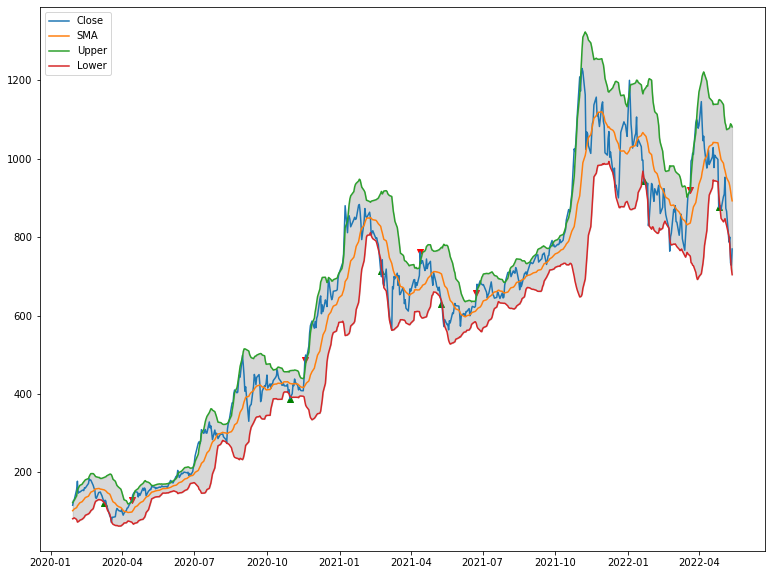

In [87]:
plt.figure(figsize=(13,10))

plt.scatter(df.iloc[buys].index,df.iloc[buys].Close ,marker="^",color="g")
plt.scatter(df.iloc[sells].index,df.iloc[sells].Close ,marker="v",color="r")

plt.fill_between(df.index,df.Upper,df.Lower,color="grey",alpha=0.3)

plt.plot(df[["Close","SMA","Upper","Lower"]])
plt.legend(["Close","SMA","Upper","Lower"])
plt.show()

In [88]:
profit = merge.shift(-1).Sells-merge.Buys

relativeprofit = (profit/merge.Buys)

percentage=relativeprofit *100

percentage.mean() # 6% return


8.22681000551405